<a href="https://colab.research.google.com/github/ankitroy22/fruit-veg-classification/blob/main/fruit_veg_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.97G/1.98G [00:21<00:00, 129MB/s]
100% 1.98G/1.98G [00:21<00:00, 100MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/fruit-and-vegetable-image-recognition.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:

train_ds = keras.utils.image_dataset_from_directory("/content/train",
                                                    labels = "inferred",
                                                    shuffle = True,
                                                    batch_size = 32,
                                                    image_size = (256,256))
test_ds = keras.utils.image_dataset_from_directory("/content/test",
                                                    labels = "inferred",
                                                    shuffle = False,
                                                    batch_size = 32,
                                                    image_size = (256,256))
val_ds = keras.utils.image_dataset_from_directory("/content/validation",
                                                    labels = "inferred",
                                                    shuffle = False,
                                                    batch_size = 32,
                                                    image_size = (256,256))

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [6]:
data_cat =  train_ds.class_names
print("Total of categories:", len(data_cat))
print()
data_cat

Total of categories: 36



['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

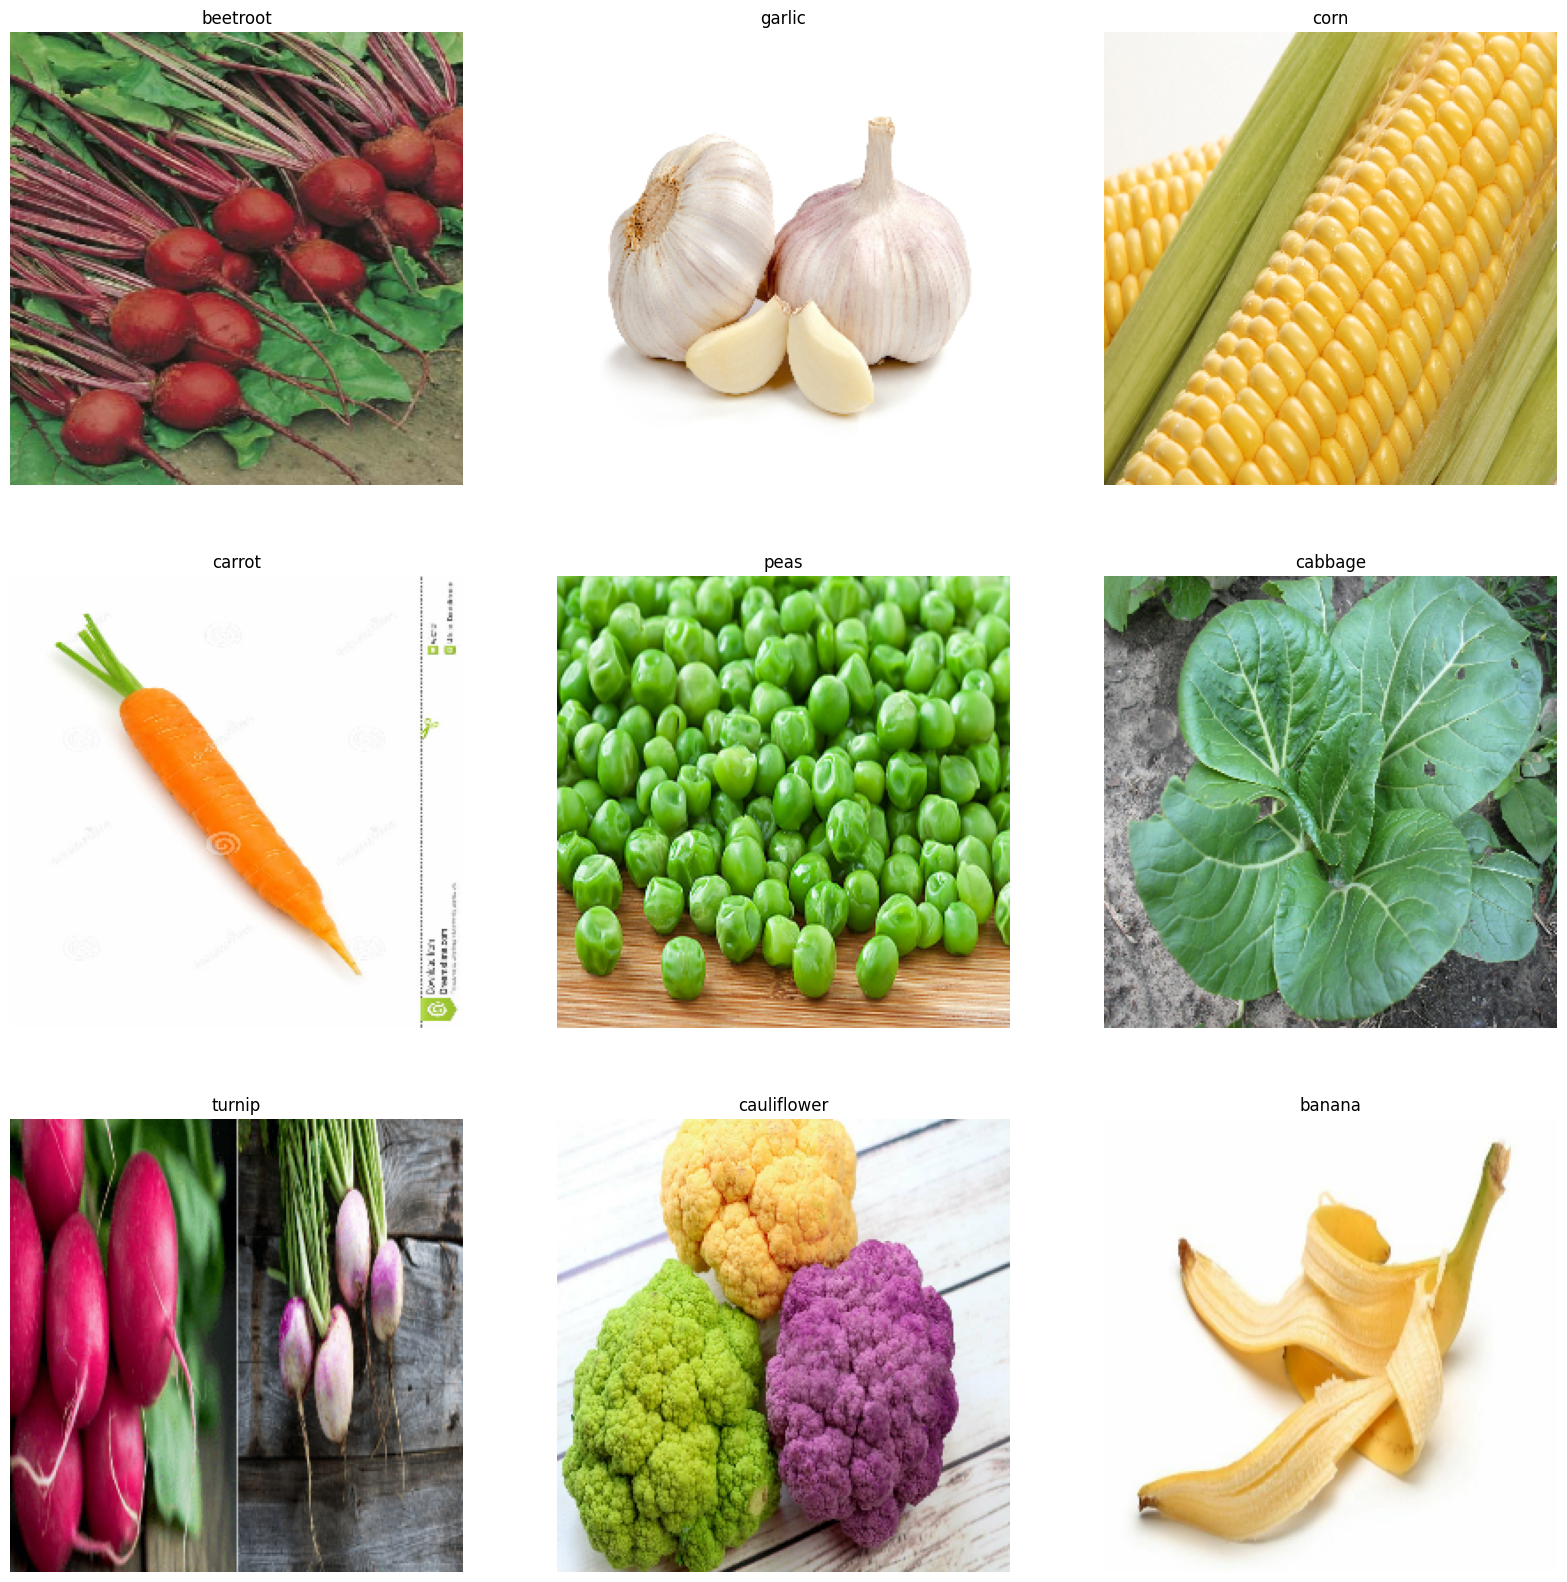

In [7]:
plt.figure(figsize = (20,20))
for image, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(data_cat[labels[i]])
    plt.axis("off")

In [8]:
# Normalize image pixel values

def process (image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)
val_ds = val_ds.map(process)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = "relu", input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=2))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides=2))

model.add(Conv2D(128, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(36, activation = "softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [11]:
model.compile("adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [12]:
history = model.fit(train_ds, validation_data=val_ds, epochs= 20)


Epoch 1/20
98/98 [==============================] - 79s 655ms/step - loss: 3.4749 - accuracy: 0.0517 - val_loss: 3.0905 - val_accuracy: 0.0684
Epoch 2/20
98/98 [==============================] - 70s 651ms/step - loss: 3.0412 - accuracy: 0.1242 - val_loss: 2.2760 - val_accuracy: 0.3590
Epoch 3/20
98/98 [==============================] - 69s 647ms/step - loss: 2.5195 - accuracy: 0.2443 - val_loss: 1.6982 - val_accuracy: 0.5442
Epoch 4/20
98/98 [==============================] - 70s 648ms/step - loss: 2.1835 - accuracy: 0.3342 - val_loss: 1.4042 - val_accuracy: 0.5812
Epoch 5/20
98/98 [==============================] - 69s 647ms/step - loss: 1.8643 - accuracy: 0.4379 - val_loss: 0.9551 - val_accuracy: 0.7066
Epoch 6/20
98/98 [==============================] - 70s 645ms/step - loss: 1.4714 - accuracy: 0.5490 - val_loss: 0.6512 - val_accuracy: 0.8091
Epoch 7/20
98/98 [==============================] - 113s 1s/step - loss: 1.0506 - accuracy: 0.6864 - val_loss: 0.4570 - val_accuracy: 0.8803
E

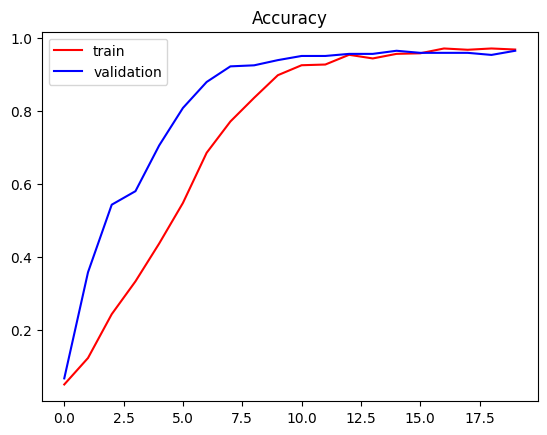

In [22]:

plt.plot(history.history["accuracy"], label= "train", color = "red")
plt.plot( history.history["val_accuracy"], label = "validation", color = "blue")
plt.title("Accuracy")
plt.legend()
plt.show()




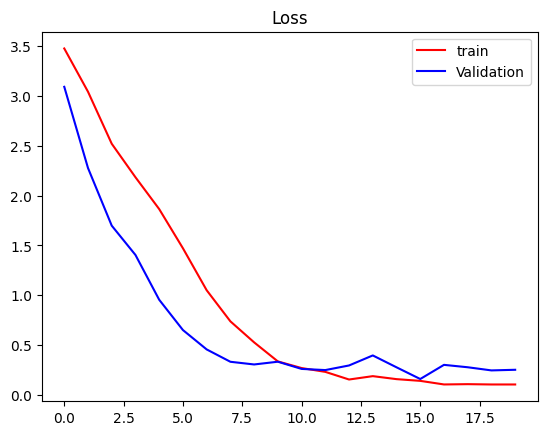

In [21]:
plt.plot(history.history["loss"], label = "train", color ="red")
plt.plot(history.history["val_loss"], label = "Validation", color = "blue")
plt.title("Loss")
plt.legend()
plt.show()

In [124]:
image_path = "/content/test/bell pepper/Image_3.jpeg"
image = keras.utils.load_img(image_path, target_size = (256,256) )
img_arr = keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr, 0)
img_batch = img_batch/255

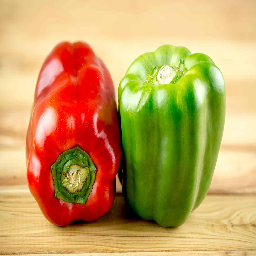

In [125]:
img_arr

In [126]:
predict = model.predict(img_batch)

1/1 [==============================] - 0s 18ms/step


In [127]:

print("Veg/Fruit in image is {} with accuracy of {:0.2f} %".format(data_cat[np.argmax(predict)], np.max(predict)*100))

Veg/Fruit in image is bell pepper with accuracy of 99.98 %


In [128]:
predict

array([[5.7550832e-08, 2.7039129e-10, 1.7940420e-10, 9.9980909e-01,
        3.4564225e-15, 5.7443792e-08, 1.0431116e-10, 7.6550562e-14,
        3.4399995e-06, 1.0031430e-10, 3.0867090e-15, 1.8781361e-14,
        9.0115889e-14, 4.3157205e-16, 2.4965809e-12, 4.8407141e-08,
        1.2617306e-12, 1.5055210e-12, 4.4988535e-14, 1.8655017e-04,
        2.9824487e-11, 6.8369832e-10, 3.6295052e-08, 4.4071326e-12,
        1.9647035e-17, 6.1370819e-16, 1.6681090e-10, 4.7704297e-12,
        3.5079342e-08, 2.8202092e-16, 2.4758635e-15, 9.6441778e-13,
        1.1877576e-08, 7.3832723e-07, 1.4078540e-13, 3.3283477e-08]],
      dtype=float32)